## Аналитика успешности игр 2016г

Описание проекта:

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


### Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы долларов)
- EU_sales — продажи в Европе (миллионы долларов)
- JP_sales — продажи в Японии (миллионы долларов)
- Other_sales — продажи в других странах (миллионы долларов)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

В работе необходимо сделать следующие шаги:

Шаг 1. Открыть файл с данными и изучить общую информацию
Путь к файлу: /datasets/games.csv.

Шаг 2. Подготовка данных  

Привести названия столбцов к нижнему регистру;  
Преобразовать данные в нужные типы.
Обработать пропуски при необходимости.  
Посчитать суммарные продажи во всех регионах.

Шаг 3. Исследовательский анализ данных

Изучить сколько игр выпускалось в разные годы, как менялись продажи по годам по платформам.  
Определить характерный срок, за который появляются новые и исчезают старые платформы.  
Нужно определить актуальный период и по данным за этот период проводить анализ. 
Определить, какие платформы лидируют по продажам, средние продажи на разных платформах.
Оценить влияние на продажи внутри платформы отзывов пользователей и критиков. 
Посмотреть на общее распределение игр по жанрам. 

Шаг 4. Портрет пользователя каждого региона

Определить самые популярные платформы, самые популярные жанры, продажи игр с классификацией по рейтингу ESRB

Шаг 5. Проверка гипотез 

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Шаг 6. Общий вывод

In [21]:
# импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats as st 


In [22]:
# games = pd.read_csv('/datasets/games.csv')
games = pd.read_csv('games.csv')
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Заменим названия столбцов


In [23]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [24]:
# присвоим новые названия столбцам
games.set_axis(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
            axis ='columns', inplace = True)

games.columns


Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [25]:
# общая информация о таблице
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Следует провести подготовку данных:
1. Заменить типы данных:  
 - year_of_release, critic_score  на "int" 
 - user_score  на "float"
2. Обработать пропуски в  столбцах "name", "year_of_release", "critic_score", "user_score"



### Шаг2. Подготовка данных


2.1.  Количество строк, с пропущенным годом выпуска 1.6% от общго числа строк, удалим их. Также удалим строки с неизвестными названиями игр, их всего 2 строки.

In [26]:
# Количество пропусков в  столбце "year_of_release"
games['year_of_release'].isnull().sum()/len(games['year_of_release'])


0.01609332934489979

In [27]:
# удалим строки с неизвестными названиями игр
games.dropna(subset=['name'], inplace = True)
# удалим строки с неизвестным годом выпуска
games.dropna(subset=['year_of_release'], inplace = True)

2.2. Столбец user_score относится к типу "object" , хотя значения там должны быть вещественными, там встречается аббревиатура tbd (To be announced - будет аннонсировано), то есть рейтинг неизвестен. Заменим "tbd" на NaN , после этого приведем столбец к вещественному типу 

In [28]:
# уникальные значения в столбце с пользовательским рейтингом, отсортированные по убыванию
games['user_score'].value_counts().sort_values(ascending=False).head()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
Name: user_score, dtype: int64

In [29]:
# заменим "tbd" на NaN и приведем столбец к вещественному типу 
games['user_score'] = games['user_score'].apply(lambda x: np.nan if x == 'tbd' else x ).astype(float)
# уникальные значения в столбце с пользовательским рейтингом
games['user_score'].value_counts().sort_values(ascending=False).head()

7.8    322
8.0    285
8.2    276
8.3    252
7.5    249
Name: user_score, dtype: int64

2.3. В столбце с рейтингом игр по мнению критиков  много пропусков, заменим эти значения на -10, чтобы не потерять эти строки

In [30]:
# заполним пропуски в  значениями "-10"
for col in ['critic_score']:
    games[col] = games[col].fillna(-10)

2.4. Заменим  тип данных в столбцах year_of_release, critic_score  на int

In [31]:
games = games.assign(
    critic_score = lambda x: x['critic_score'].astype('int64'),
    year_of_release = lambda x: x['year_of_release'].astype('int64')    
)


2.5. Рейтинг игр ESRB :  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех», первоначально "K-A" ("Kids to Adults")  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»

In [32]:
games['rating'].value_counts().sort_values()

AO         1
RP         1
K-A        3
EC         8
E10+    1393
M       1536
T       2905
E       3921
Name: rating, dtype: int64

Игры "для всех" первоночально имели рейтинг "К-А", позже его заменили на рейтинг "Е". В нашей таблице всего 3 таких строчки, заменим рейтинг на "Е"

In [33]:
# заменим рейтинг "К-А" на рейтинг "Е". 
games['rating'] = games['rating'].apply(lambda x: 'E' if x == 'K-A' else x )


2.6. Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [34]:
# новый столбец "total_sales" равен сумме продаж по регионам NA, EU, JP и other
games = games.assign(total_sales = lambda x:
                     x['na_sales'] + x['eu_sales'] + x['jp_sales']+ x['other_sales'])
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-10,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-10,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-10,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-10,NaN,NaN,28.31


2.7. Посмотрим есть ли дупликаты в таблице.

In [35]:
# количество дупликатов
games.duplicated().sum()

0

### Вывод
В ходе предобработки данных были удалены строки с пропущенным годом выпуска (1.6% от общго числа строк) и строки с неизвестными названиями игр. Столбец 'user_score' приведен к вещественному типу, при этом "tbd" заменены на NaN.  Заменен тип данных на int в столбцах year_of_release, critic_score (пропуски в "critic_score"заменены  на -10)  
В отдельный столбец "total_sales" записаны суммарные продажи во всех регионах.

### Шаг 3. Исследовательский анализ данных
3.1 Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

,count_game
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


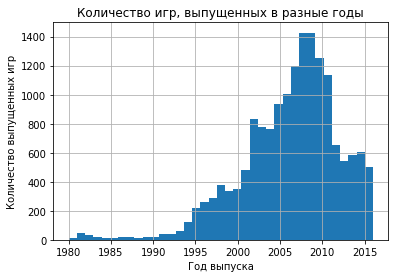

In [36]:
# гистограмма по количеству игр в разные годы
games.hist('year_of_release', bins=37, grid=True)
plt.title('Количество игр, выпущенных в разные годы')
plt.xlabel('Год выпуска');
plt.ylabel('Количество выпущенных игр');

# таблица по количеству игр, выходивших в год 
games.groupby('year_of_release').agg(count_game=('name','count'))\
.sort_values('count_game',ascending=False).head(10)


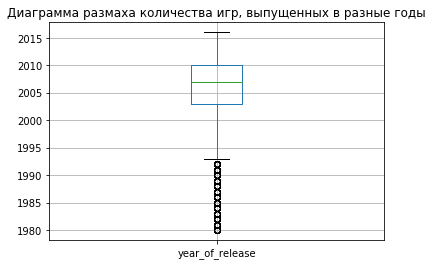

In [72]:
games.boxplot('year_of_release')
plt.title('Диаграмма размаха количества игр, выпущенных в разные годы');

Больше всего выпускалось игр в 2007-2011 годах, к 2016 году их количество падает. До 1993 года выпускалось очень мало игр, рассмтривать этот период не информативно.

#### 3.2. Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Найдем характерный срок, когда появляются новые и исчезают старые платформы.

In [38]:
# сгруппируем таблицу по платформам , посчитаем суммарные продажи, отсортируем по убыванию
# и выберем первые 10 платформ с самыми большими продажами
top_platform = games.groupby('platform').agg(total_sales=('total_sales','sum'))\
.sort_values('total_sales',ascending=False).head(10)
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [39]:
top_platform.index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

In [40]:
# Выберем платформы из таблицы top_platform и посчитаем суммарные продажи по платформам и годам
games_grouped_by_platform_and_years = games.query('platform in @top_platform.index')\
.groupby(['platform', 'year_of_release'])\
.agg(total_sales=('total_sales','sum')).reset_index()

games_grouped_by_platform_and_years

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
92,X360,2012,99.74
93,X360,2013,88.58
94,X360,2014,34.74
95,X360,2015,11.96


Построим распределение по годам

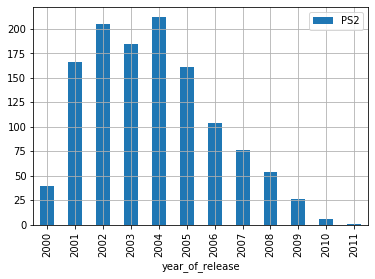

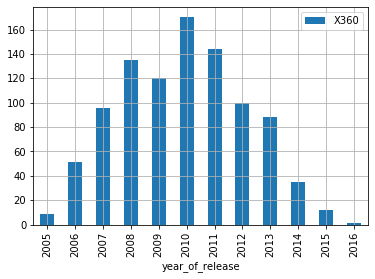

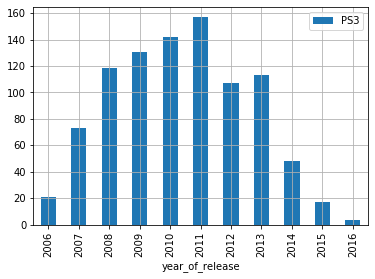

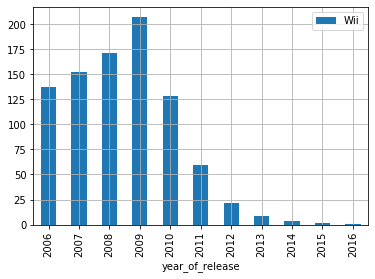

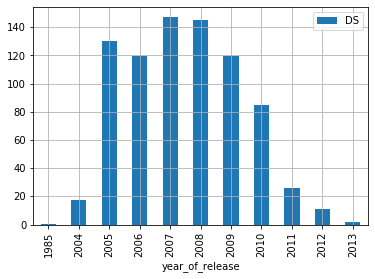

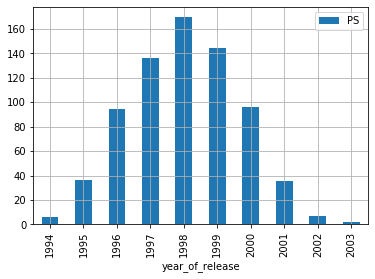

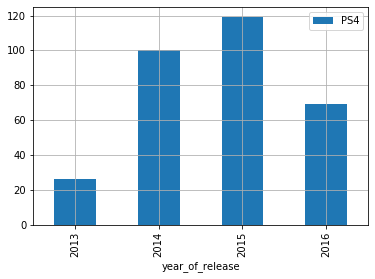

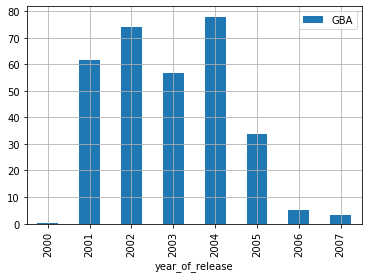

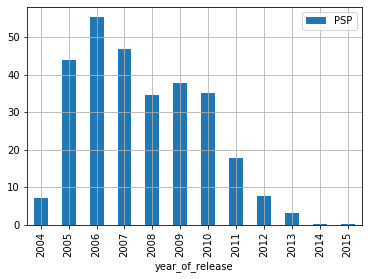

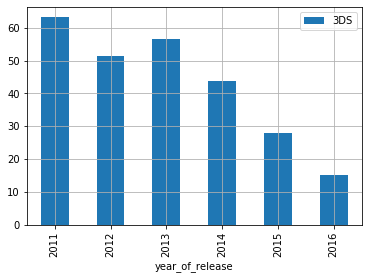

In [41]:

    
# для каждой коммерчески удачной платформы (из top_platform.index) 
# построим диаграмму суммарной выручки по годам 
for col in top_platform.index:
     games_grouped_by_platform_and_years[games_grouped_by_platform_and_years['platform'] == col]\
    .plot(kind='bar',x='year_of_release', y='total_sales', label=col, grid=True )
plt.show()



Из графиков распределения по годам для платформ с самой большой выручкой видно, что появляются новые и исчезают старые платформы в течение 10-11 лет, причем первые 5-6 лет выручка растет, а затем к 10-11 году падает до нуля. 


### Для дальнейшего анализа возьмем данные за предыдущие 5 лет - с 2012 по 2016 года
В будущем будем использовать для анализа данные только по  этим годам

 #### 3.3. Посмотрим, какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.

In [42]:
# создадим список платформ, которые ещё существовали в 2016 году
platforms = games.query('year_of_release == 2016')['platform'].value_counts().index
platforms

Index(['PS4', 'XOne', 'PSV', 'PC', '3DS', 'PS3', 'WiiU', 'X360', 'Wii'], dtype='object')

In [43]:
# данные по играм за 2012 - 2016 года запишем в новый датасет "games_last_years"
games_last_years = games.query('year_of_release >= 2012 & platform in @platforms')
# games_last_years

In [44]:
# сгруппируем игры по платформам, затем по суммарной годовой выручке
games_last_years_group = games_last_years.groupby(['platform', 'year_of_release'])\
.agg(total_sales=('total_sales','sum')).reset_index()
# games_last_years_group

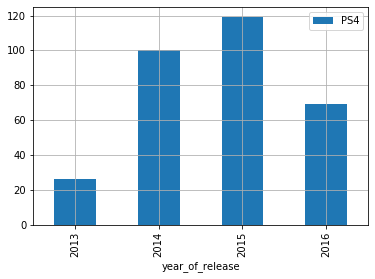

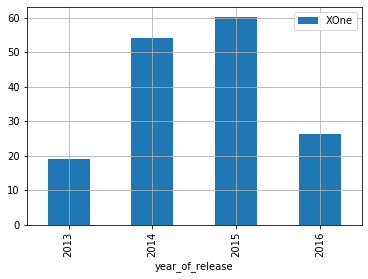

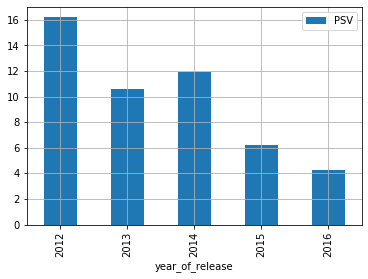

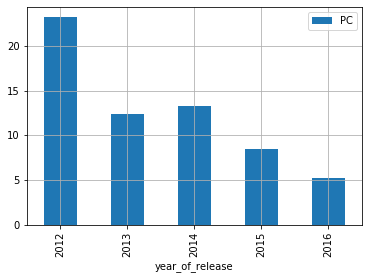

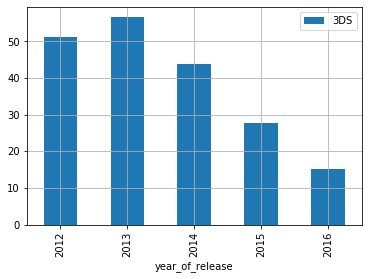

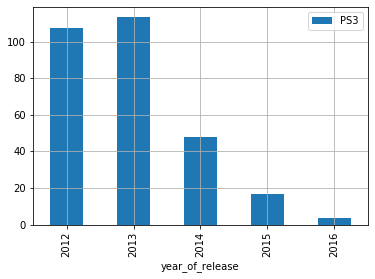

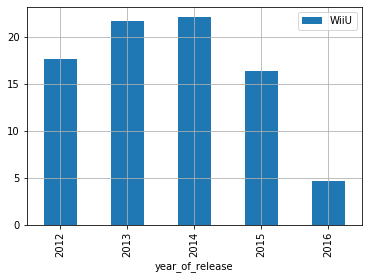

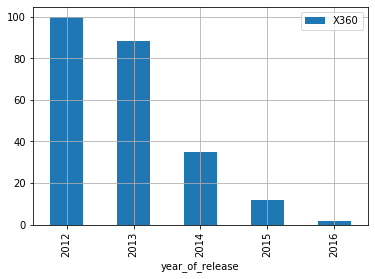

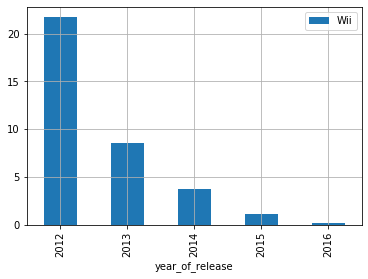

In [45]:
# графики годовой выручки по отдельным платформам

for col in platforms:
     games_last_years_group[games_last_years_group['platform'] == col]\
    .plot(kind='bar',x='year_of_release', y='total_sales', label=col, grid=True )
plt.show()

Выручка от продажи игр в 2016 году падала на всех платформах. Самая большая годовая выручка на 2016 год у платформ PS4 и XOne, они появились относительно недавно, в 2013 году и до 2015 года показывали рост прибыли. 

#### 3.4. Выясним, велика ли разница в глобальных продажах каждой игры по платформам и в средних продажах.
Для этого построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. 

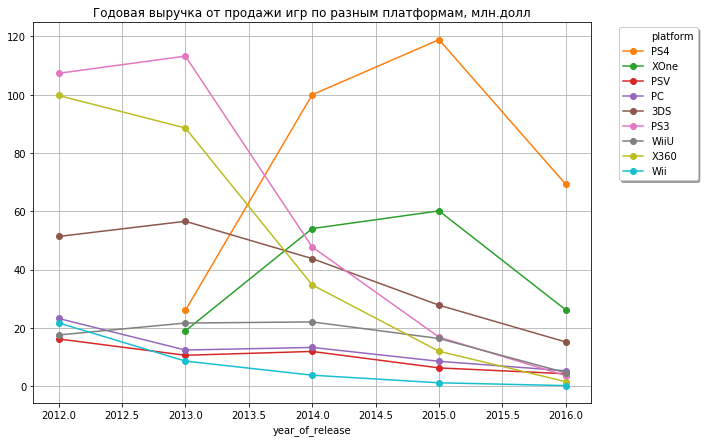

In [46]:
# зададим оси графика
ax = games_last_years_group.query('platform == "3DS"') \
.plot(x='year_of_release', y='total_sales', alpha=0, label='platform', figsize=(10,7), 
      title='Годовая выручка от продажи игр по разным платформам, млн.долл')

# на тех же осях для каждой платформы построим график по суммарным продажам за год
for col in platforms:
     games_last_years_group[games_last_years_group['platform'] == col]\
    .plot(style='o-',x='year_of_release', y='total_sales', label=col, grid=True, ax=ax )
        
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0), ncol=1, shadow=True)    
plt.show()

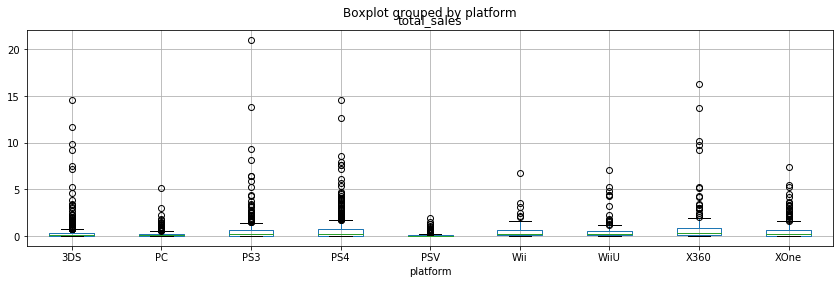

In [47]:
# график «ящик с усами» по суммарной выручке с разбивкой по платформам

ax=(games_last_years
    .query('platform in @platforms')
    .boxplot('total_sales', by='platform', figsize=(14,4))
)

Чтобы посмотреть на среднюю выручку от продажи игр, ограничим ось графика до 2 млн долл.

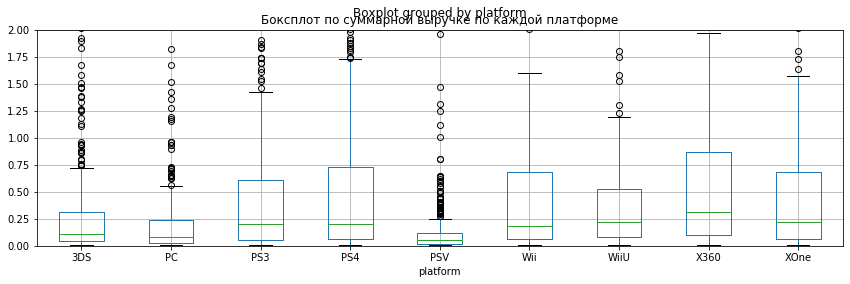

In [76]:
# по суммарной выручке по отдельным играм 
ax=(games_last_years
    .query('platform in @platforms')
    .boxplot('total_sales', by='platform', figsize=(14,4))
)
# ограничим ось у до 2 млн долл.
ax.set_ylim(0,2)
# plt.title('Боксплот по суммарной выручке по каждой платформе');

Несмотря на то, что выручка по отдельным играм может достигать 20 млн.долларов, средние продажи от игр на уровне 0.25 млн долларов для разных платформ (за исключением 3DS, PC, PSV у них около 0,1 млн.долл.). В среднем больше всего коммерчески удачных игры выпускали PS3, PS4, X360, XOne, WiiU

#### 3.5. Влияние отзывов пользователей и критиков на продажи внутри одной платформы.
Рассмотрим на примере PS4.
Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.


Оставим только те строки, где изначально был рейтинг, надо удалить строки с отрицательным рейтингом, который мы ввели искусственно.

In [49]:
rated_games = games_last_years.query("critic_score >=0")
# rated_games

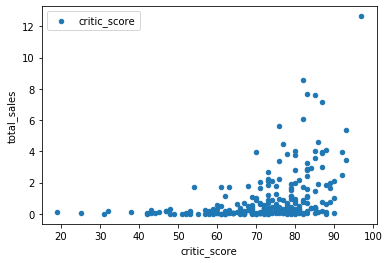

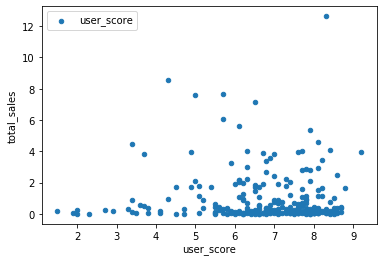

In [50]:
# диаграмма рассеяния для 'critic_score','user_score' для платформы 'PS4'
columns=['critic_score','user_score']
for col in columns:
    rated_games.query("platform == 'PS4'").plot(x=col, y='total_sales', kind='scatter', label= (col))    


In [51]:
# коэффициент кореляции между общими сборами, оценками критиков и пользователей для платформы 'PS4'
columns=['total_sales','critic_score','user_score']
rated_games.query("platform == 'PS4'")[columns].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.033625
critic_score,0.406568,1.000000,0.557654
user_score,-0.033625,0.557654,1.000000


Мы расчитывали кореляцию и строили графики для платформы 'PS4'. 
Коэффициент кореляции между общими сборами по играм и оценкой критиков равен 0.4, то есть слабая положительная связь, из диаграммы рассеивания видно, что не все игры, высоко оцененные критиками имели коммерческий успех. Скорее всего жанр таких игр изначально имел немного поклонников.  
 А между оценками пользователей и сборами по продажам связь отсутствует, есть и игры с низкими оценками, но высокими продажами, так и высокими оценками, но низкими продажами.



In [52]:
platforms

Index(['PS4', 'XOne', 'PSV', 'PC', '3DS', 'PS3', 'WiiU', 'X360', 'Wii'], dtype='object')

Рассмотрим коэффициенты корреляции для всех платформ

In [53]:
columns=['total_sales','critic_score','user_score']
# таблицы коэффициентов корреляции для всех платформ
for col in platforms:
    corr1 = rated_games.query("platform == @col")[columns].corr()
    print()
    print (col)
    print (corr1)



PS4
              total_sales  critic_score  user_score
total_sales      1.000000      0.406568   -0.033625
critic_score     0.406568      1.000000    0.557654
user_score      -0.033625      0.557654    1.000000

XOne
              total_sales  critic_score  user_score
total_sales      1.000000      0.416998   -0.094003
critic_score     0.416998      1.000000    0.472462
user_score      -0.094003      0.472462    1.000000

PSV
              total_sales  critic_score  user_score
total_sales      1.000000      0.094488    0.013902
critic_score     0.094488      1.000000    0.699199
user_score       0.013902      0.699199    1.000000

PC
              total_sales  critic_score  user_score
total_sales      1.000000      0.237243   -0.136934
critic_score     0.237243      1.000000    0.432587
user_score      -0.136934      0.432587    1.000000

3DS
              total_sales  critic_score  user_score
total_sales      1.000000      0.320803    0.201813
critic_score     0.320803      1.000000

In [54]:
# количество оценок платформы Wii
rated_games.query("platform == 'Wii'")['critic_score'].count()


5

Для большинства платформ коэффициент кореляции между рейтингом критиков и суммарными продажами лежит в интервале(0,3 - 0,42), что означает, что есть слабая положительная связь.Исключение составляет PSV, там коэффициенты кореляции между оценками и продажами по играм около 0. А для Wii всего лишь 5 оценок, поэтом коэффициент там некорректен.
Между оценками пользователей и суммарными продажами никакой связи нет для большинства платформ, коэффициент кореляции не превышает 0.2, только для  WiiU коэффициент кореляции равен 0.4, т.е. имеется слабая положительная связь между оценками пользователей и суммарными продажами. 
Из этого следует вывод, что критики более объективны в своих оценках, пользователи же могут низко оценить игру не потому, что она плохая, а просто не оправдала ожиданий.

#### 3.6. Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанры. 

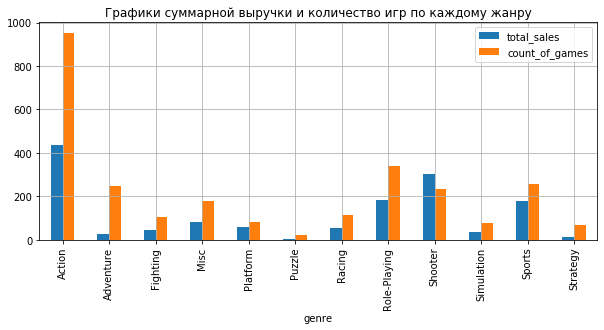

In [79]:
#  получим по каждому жанру суммарную выручку и число игр 
games_by_genre = games_last_years.pivot_table(index = 'genre', 
                          values= ['total_sales'],aggfunc=['sum','count'])
# новые названия столбцов
games_by_genre.columns=['total_sales','count_of_games']

# графики суммарной выручки и количество игр по каждому жанру  
games_by_genre.plot(kind='bar', grid=True,    figsize=(10,4))

# по оси х названия жанров
labels=games_by_genre.index
# интервал для названий
xs = range(len(labels))
# подписи на оси х
plt.xticks(xs, labels, rotation='vertical');
plt.title('рафики суммарной выручки и количество игр по каждому жанру');

Самые большие суммарные сборы по играм в жанре "Экшен", "Шутеры", "Спорт", "Ролевые". Игр в жарне "Экшен"  больше остальных, также распространены жанры "Шутер", "Спорт", "Ролевые". В стиле 'Strategy' и 'Puzzle' самые низкие сборы, видимо, поэтому игр в этих жанрах выпускается мало. "Adventure" также показывают очень маленькие сборы, правда количество выпущенных игр достаточно велико.

(0, 4)

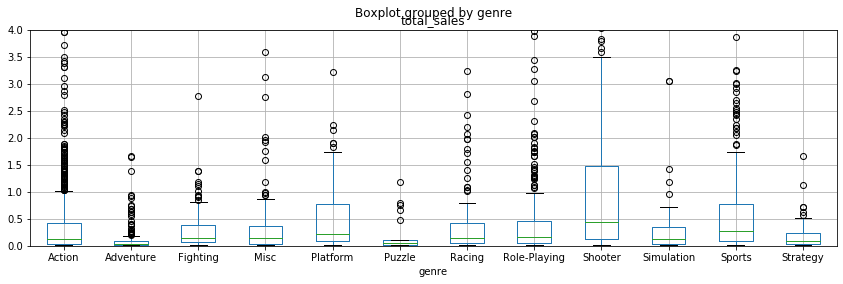

In [56]:
# диаграммы размаха для всех жанров
ax=(games_last_years
    .query('platform in @platforms')
    .boxplot('total_sales', by='genre', figsize=(14,4))
)
ax.set_ylim(0,4)

В среднем, самые выгодные жанры это платформеры, шутеры и спорт, самые низкие продажи у жанров приключений и квестов. Средняя выручка жанра 'Action' очень низкая, игр в таком жанре выходит больше всего, но не все они коммерчески удачны.

### Вывод.
В течение 10-11 лет появляются новые и исчезают старые платформы, причем первые 5-6 лет выручка растет, а затем к 10-11 году падает до нуля. Для дальнейшего анализа будем учитывать данные за предыдущие 5 лет - с 2012 по 2016 года.  
Выручка от продажи игр в 2016 году падала на всех платформах. Самая большая годовая выручка на 2016 год у платформ PS4 и XOne, они появились относительно недавно, в 2013 году и до 2015 года показывали рост прибыли.   
Средние продажи от игр на уровне 0.25 млн долларов для большинства платформ (за исключением 3DS, PC, PSV у них около 0,1 млн.долл.), хоть отдельные игры могут принести прибыль до 20 млн.долларов. В среднем больше всего коммерчески удачных игры выпускали PS3, PS4, X360, XOne, WiiU  
Для большинства платформ коэффициент кореляции между рейтингом критиков и суммарными продажами лежит в интервале(0,3 - 0,42). Между оценками пользователей и суммарными продажами никакой связи нет для большинства платформ, коэффициент кореляции не превышает 0.2. Критики более объективны в своих оценках.  
В среднем, самые выгодные жанры это платформеры, шутеры, ролевые и спорт, самые низкие продажи у жанров приключений и квестов. 


### Шаг 4. Портрет пользователя каждого региона

Определим самые популярные платформы (топ-5) для пользователя каждого региона (NA, EU, JP). Опишите различия в долях продаж.

In [57]:
games_for_region= games_last_years.pivot_table(index='platform',
                             values=['na_sales','eu_sales','jp_sales', 'total_sales'], aggfunc=['sum'])
games_for_region.columns=['na_sales','eu_sales','jp_sales', 'total_sales']

# доля продаж в регионе NA к сумме по всем платформам, в процентах
games_for_region['na_sales_rated'] = (
    games_for_region['na_sales'] / games_for_region['na_sales'].sum()*100)


# доля продаж в регионе EU к сумме по всем платформам, в процентах
games_for_region['eu_sales_rated'] = (
    games_for_region['eu_sales'] / games_for_region['eu_sales'].sum()*100)

# доля продаж одной платформы  к сумме по всем платформам в регионе JP, в процентах
games_for_region['jp_sales_rated'] = (
    games_for_region['jp_sales'] / games_for_region['jp_sales'].sum()*100)


games_for_region.sort_values('jp_sales', ascending=False)


,na_sales,eu_sales,jp_sales,total_sales,na_sales_rated,eu_sales_rated,jp_sales_rated
platform,,,,,,,
X360,74.52,1.57,140.05,236.54,14.818939,0.880094,23.889126
PS4,141.09,15.96,108.74,314.14,28.056953,8.946690,18.548401
PS3,106.86,35.29,103.38,288.79,21.250025,19.782499,17.634115
XOne,51.59,0.34,93.12,159.32,10.259113,0.190594,15.884009
3DS,42.64,87.79,55.31,194.61,8.479329,49.212400,9.434542
WiiU,25.13,13.01,38.10,82.19,4.997315,7.293010,6.498934
PC,37.76,0.00,19.12,62.65,7.508899,0.000000,3.261407
Wii,11.92,3.39,17.45,35.37,2.370394,1.900331,2.976546
PSV,11.36,21.04,10.98,49.18,2.259033,11.794383,1.872921


In [58]:
# топ5  платформ для Японии , с процентами популярности от других платформ
popular_platform_for_region = (
    games_for_region.sort_values('jp_sales', ascending=False).head(5)['jp_sales_rated'].reset_index()
)

# добавим топ5  платформ для СевАмерики , с процентами популярности от других платформ
popular_platform_for_region[['platform_na','na_sales_rated']] = (
    games_for_region.sort_values('na_sales', ascending=False).head(5)['na_sales_rated'].reset_index()
)

# добавим топ5  платформ для Евросоюза , с процентами популярности от других платформ
popular_platform_for_region[['platform_eu','eu_sales_rated']] = (
    games_for_region.sort_values('eu_sales', ascending=False).head(5)['eu_sales_rated'].reset_index()
)

popular_platform_for_region

,platform,jp_sales_rated,platform_na,na_sales_rated,platform_eu,eu_sales_rated
0,X360,23.889126,PS4,28.056953,3DS,49.212400
1,PS4,18.548401,PS3,21.250025,PS3,19.782499
2,PS3,17.634115,X360,14.818939,PSV,11.794383
3,XOne,15.884009,XOne,10.259113,PS4,8.946690
4,3DS,9.434542,3DS,8.479329,WiiU,7.293010


В Японии 28% продаж игр приходится на Х360, 21% - PS3 , 13% - PS4. В Северной Америке 24,8% продаж игр приходится на PS3, 21.4% - PS4, 17.8% - X360. В Европе на первом месте по продажам 3DS-47%, затем PS3 и PSV - 23,1% и 10.2% соответственно. На первом месте в Северной Америке приставка Playstation, она входит в топ-3 по продажам во всех регионах, в Японии самая популярная приставка Xbox, в Европе - Nintendo. 

#### Самые популярные жанры (топ-5). 

In [59]:
genre_by_region= games_last_years.pivot_table(index='genre',
                             values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
genre_by_region.columns=['na_sales','eu_sales','jp_sales']
genre_by_region.sort_values('jp_sales', ascending=False).head(5)['jp_sales'].reset_index()


,genre,jp_sales
0,Action,177.00
1,Shooter,144.77
2,Sports,81.38
3,Role-Playing,60.65
4,Misc,38.13


In [60]:
genre_by_region.sort_values('eu_sales', ascending=False).head(5)['eu_sales'].reset_index()

,genre,eu_sales
0,Role-Playing,59.12
1,Action,49.18
2,Misc,12.45
3,Simulation,10.35
4,Shooter,9.23


In [61]:
genre_by_region.sort_values('na_sales', ascending=False).head(5)['na_sales'].reset_index()

,genre,na_sales
0,Action,158.43
1,Shooter,113.47
2,Sports,68.84
3,Role-Playing,46.76
4,Racing,27.29


В Японии и Северной Америке похожие предпочтения по жанрам - экшн, шутеры, спорт. В Европе же самые популярное - ролевые игры, экшн и разное.

### Влияние рейтинга ESRB на продажи в отдельном регионе

In [62]:
genre_by_ESRB = games_last_years.pivot_table(index='rating',
                             values=['na_sales','eu_sales','jp_sales'], aggfunc=['sum'])
genre_by_ESRB.columns=['na_sales','eu_sales','jp_sales']
genre_by_ESRB.sort_values('jp_sales', ascending=False)

,na_sales,eu_sales,jp_sales
rating,,,
M,193.96,21.20,231.57
E,111.79,27.62,113.44
E10+,54.84,8.19,75.09
T,52.96,25.76,66.02


Рейтинг игр ESRB :  
«EC» («Early childhood») — «Для детей младшего возраста»  
«E» («Everyone») — «Для всех», первоначально "K-A" ("Kids to Adults")  
«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»  
«T» («Teen») — «Подросткам»  
«M» («Mature») — «Для взрослых»  
«AO» («Adults Only 18+») — «Только для взрослых»  
«RP» («Rating Pending») — «Рейтинг ожидается»

Популярность игр в зависимости от рейтинга ESRB в Америке и Японии одинакова. Топ-1 - это игры для взрослых, затем игры для всех, для подростков, и затем для детей 10 лет. В Европе игры для взрослых занимают топ-3.

### Вывод
Выручка от продажи игр в Японии и Северной Америке выше в 2-3 раза, чем в Европе.  
Пристрастия игроков из Японии и Северной Америки похожи. В Японии в Топ-3 входят Х360, PS3,PS4; в Северной Америке X360 на 3-м месте, топ-3 выглядит так: PS3, PS4, X360. В Европе популярны платформы 3DS, PS3 и PSV.   
В Японии и Северной Америке похожие предпочтения по жанрам - экшн, шутеры, спорт. В Европе же самые популярное - ролевые игры, экшн и разное.   
Популярность игр в зависимости от рейтинга ESRB в Америке и Японии одинакова. Топ-1 - это игры для взрослых. В Европе игры для взрослых занимают топ-3. Вероятно, в Японии и Америке в видеоигры играют больше взрослых, чем детей.
В целом, портрет пользователя из Японии и Америки очень похожи.



### Шаг 5. Гипотезы
Проверим следующие гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [63]:
platforms

Index(['PS4', 'XOne', 'PSV', 'PC', '3DS', 'PS3', 'WiiU', 'X360', 'Wii'], dtype='object')

Выясним, одинаковые ли пользовательские рейтинги платформ Xbox One и PC. Нулевая гипотеза будет такая: "средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Для проверки равенства среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind

In [64]:
games_last_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-10,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-10,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


In [65]:
# средняя оценка пользователей игр на XOne
mean_score_XOne = games_last_years.query('platform =="XOne" & user_score >=0')['user_score'].mean()
# games_last_years.query('platform =="XOne" & user_score >=0')['user_score'].describe() 
mean_score_XOne

6.52142857142857

In [66]:
# средняя оценка пользователей игр на PC
mean_score_PC = games_last_years.query('platform =="PC" & user_score >=0')['user_score'].mean()
mean_score_PC 
# games_last_years.query('platform =="PC" & user_score >=0')['user_score'].describe()

6.428640776699027

In [80]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_last_years.query('platform =="XOne" & user_score >=0')['user_score'], 
    games_last_years.query('platform =="PC" & user_score >=0')['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу


**У нас не получилось отвергнуть нулевую гипотезу. Полученное значение p-value говорит о том, что с вероятностью в 55% мы можем  получить меньшее различие между средними оценками. Итак, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

#### Проверим 2 гипотезу:
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза будет такая: "разницы между рейтингами жанров Action и Sports нет, средняя пользовательская оценка этих жанров равна"

In [68]:
# средняя оценка пользователей игр жанрa Action
mean_score_action = games_last_years.query('genre =="Action" & user_score >=0')['user_score'].mean()
mean_score_action
# games_last_years.query('genre =="Action" & user_score >=0')['user_score'].describe()

6.833653846153855

In [69]:
# средняя оценка пользователей игр жанрa Sports
mean_score_sports = games_last_years.query('genre =="Sports" & user_score >=0')['user_score'].mean()
mean_score_sports
# games_last_years.query('genre =="Sports" & user_score >=0')['user_score'].describe()

5.466494845360825

In [70]:
alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_last_years.query('genre =="Action" & user_score >=0')['user_score'], 
    games_last_years.query('genre =="Sports" & user_score >=0')['user_score']
)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.639495732612309e-26
Отвергаем нулевую гипотезу


Вероятность получить равные оценки пользователей для  жанров Action  и Sports равна почти нулю, отвергаем нулевую гипотезу. Итак, средние пользовательские рейтинги жанров Action  и Sports разные.

### Результаты проверки гипотез

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
2. Средние пользовательские рейтинги жанров Action  и Sports разные.

### Общий вывод.
В течение 10-11 лет появляются новые и исчезают старые платформы, причем первые 5-6 лет выручка растет. Для анализа оставили данные за предыдущие 5 лет - с 2012 по 2016 года.  
Выручка от продажи игр в 2016 году падала на всех платформах. Самая большая годовая выручка на 2016 год у платформ PS4 и XOne.  
Средние продажи от игр на уровне 0.25 млн долларов для большинства платформ (за исключением 3DS, PC, PSV у них около 0,1 млн.долл.). В среднем больше всего коммерчески удачных игры выпускали PS3, PS4, X360, XOne, WiiU    
Для большинства платформ коэффициент кореляции между рейтингом критиков и суммарными продажами лежит в интервале(0,3 - 0,42). Между оценками пользователей и суммарными продажами никакой связи нет.  
В среднем, самые выгодные жанры это платформеры, шутеры, ролевые и спорт, самые низкие продажи у жанров приключений и квестов.   

Выручка от продажи игр в Японии и Северной Америке выше в 2-3 раза, чем в Европе.   
В целом, портрет пользователя из Японии и Америки очень похожи. Они предпочитают Xbox и Playstation, любимые жанры - экшн, шутеры, спорт, и любые игры для взрослых. В Европе популярны Nintendo и Playstation,самые популярные жанры - ролевые игры, экшн и разное, самые популярные игры  из категории "для всех"

После проверки гипотез, выяснили:   
1) средние пользовательские рейтинги платформ Xbox One и PC одинаковые.  
2) средние пользовательские рейтинги жанров Action  и Sports разные, жанр Action имеет большую оценку пользователей.